In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Unsupervised Learning - Clustering (K-Means Clustering)
K-Means, `(K)` mewakili `jumlah cluster`, `(Means)` berarti `rata-rata`, jadi K-Means merupakan rata-rata dari setiap cluster, rata-rata pada K-Means juga disebut `Centroid`.
Cara kerja algoritma ini yaitu :
- Pertama memilih sample secara acak kemudian dijadikan centroid 
<br>Centroid adalah sebuah sampel pada data yang menjadi pusat dari sebuah klaster.
<img src="./image/kmean-terdekat.jpeg"  width="500px">
- Kemudian setiap sample yang berdekatan dengan centroid akan masuk ke dalam cluster
<img src="./image/cluster1.jpeg"  width="500px">
- Setelah setiap sampel dimasukkan pada klaster dari centroid terdekat, K-Means akan menghitung rata-rata dari setiap sampel dan menjadikan rata-rata tersebut sebagai `centroid baru`
<img src="./image/cluster2.jpeg"  width="500px">
- Keempat, langkah kedua diulang kembali, Sampel akan dimasukkan ke dalam klaster dari centroid baru, dan mengulangi langkah ketiga, yaitu menemukan rata-rata dari klaster terbaru, Ketika centroid baru tidak ditemukan, maka proses clustering berhenti.
- Untuk mengukur kualitas dari pengklasteran, K-Means akan melakukan iterasi lagi dan mengulangi lagi tahap pertama yaitu memilih sampel secara acak untuk dijadikan centroid
<img src="./image/new-cluster.jpeg"  width="500px">
- Dan mengulangi langkah selanjutnya hingga hasil akhir seperti ini
<img src="./image/iterasi2.jpeg"  width="500px">
- Untuk membandingkan klaster setiap iterasi, K-Means akan menghitung variance dari tiap iterasi. `Variance adalah persentase jumlah sampel pada tiap klaster`.
<img src="./image/result.jpeg"  width="500px">
<img src="./image/result2.jpeg"  width="500px">


### Load Data
You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.
<br><br>
Problem Statement
You own the mall and want to understand the customers like who can be easily converge `[Target Customers]` so that the sense can be given to marketing team and plan the strategy accordingly.
<br><br>
[Dataset Download](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [2]:
df = pd.read_csv('./datasets/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing
Ada beberapa data yang perlu kita proses sebelum membuat model, seperti mengubah nama kolom agar lebih seragam, mengubah data kategorik menjadi numerik, dan menghapus data yang tidak penting 

#### Rename Coloms

In [11]:
df = df.rename(columns={'Gender':'gender', 
                        'Age':'age',
                        'Annual Income (k$)':'annual_income',
                        'Spending Score (1-100)':'spending_score'})

#### Convert Data Category to Numeric

In [12]:
df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

#### Delete Data

In [13]:
X = df.drop(['CustomerID', 'gender'], axis=1)

### Create K-Means Model
Sebelum itu kita menghitung inersia terlebih dahulu, `inersia` bersungsi untuk memberi tahu `seberapa jauh jarak setiap sampel pada sebuah klaster`. Semakin kecil inersia maka semakin baik karena jarak setiap sampel pada sebuah klaster lebih berdekatan. Dan kemudian dari hasil inersia ini kita bisa gunakan metode elbow untuk menentukan berapa cluster yang dapat kita gunakan pada model yang ingin kita buat.

In [15]:
cluster = []

for k in range(1,11):
    km = KMeans(n_clusters=k).fit(X)
    cluster.append(km.inertia_)

C:\Users\nomjn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Buat diagram untuk mengetahui cluster yang ingin kita buat, bisa kita lihat pada hasil di bawah, cluster yang bisa kita buat sebanyak 5, karena 6-11 jumlah inersia pada cluster semakin menurun.

C:\Users\nomjn\AppData\Local\Temp/ipykernel_10492/3594819102.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


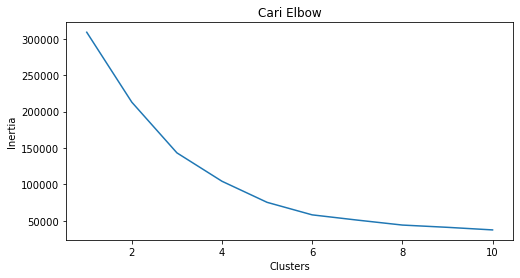

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=cluster, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
fig.show()

Terakhir kita bisa melatih kembali K-Means dengan jumlah K yang didapat dari metode Elbow. Lalu kita bisa membuat plot hasil pengklasteran K-Means dengan menjalankan kode di bawah.

In [20]:
km5 = KMeans(n_clusters=5).fit(X)

In [21]:
X['Label'] = km5.labels_

C:\Users\nomjn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


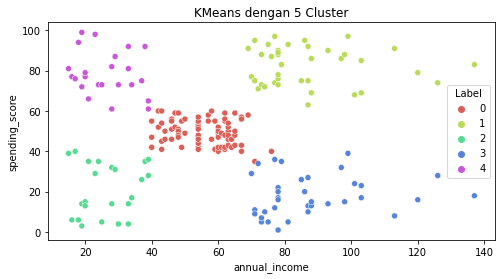

In [22]:
plt.figure(figsize=(8,4))

sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Label'], palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()